In [2]:
import wave
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# waveファイルから波形データを取得
wf = wave.open('./yukari_1st/all_test_01_16.wav', 'rb')
data = wf.readframes(wf.getnframes())
data = np.frombuffer(data, dtype='int16')
wav_length = float(wf.getnframes()) / wf.getframerate() # 長さ

In [4]:
# FFTのサンプル数
N = 2**9

In [5]:
# FFTで用いるハミング窓
hamming_window = np.hamming(N)

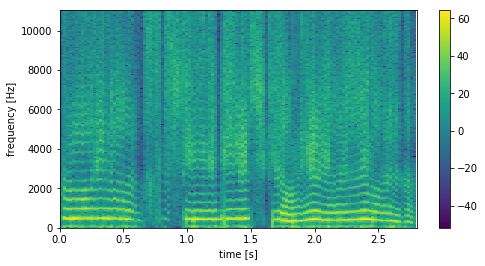

In [37]:
# スペクトログラムの描画
plt.figure(figsize=[8, 4])
pxx, freqs, bins, im = plt.specgram(data, 
                                    NFFT=N, Fs=wf.getframerate(), 
                                    noverlap=0, 
                                    window=hamming_window,
                                   aspect='auto')
plt.axis([0, wav_length, 0, wf.getframerate() / 2])
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')
plt.colorbar()
plt.savefig('./spectrogram_plot_test')
plt.show()

In [14]:
im